In [9]:
import s3fs
import pandas as pd

path = "IHS/ship_data.csv"
bucket = "projet-hackathon-un-2022"

fs = s3fs.S3FileSystem(
  client_kwargs={'endpoint_url': 'https://minio.lab.sspcloud.fr'}
)

ship_data = pd.read_csv(fs.open(f'{bucket}/{path}',
                         mode='rb'))
ship_codes = pd.read_csv(fs.open(f'{bucket}/{path}'.replace("data","codes"),
                         mode='rb')
                 )

In [10]:
ship_codes.head(2)

,StatCode5,ShipTypeLevel1,ShipTypeLevel2,ShipTypeLevel3,ShipTypeLevel4,ShipTypeLevel5,SubGroup,SubType
0,A11A2TN,Cargo Carrying,Tankers,Liquefied Gas,LNG Tanker,LNG Tanker,Petroleum Products,LNG Tanker
1,A11A2TQ,Cargo Carrying,Tankers,Liquefied Gas,LNG Tanker,CNG Tanker,Petroleum Products,CNG Tanker


In [11]:
ship_data.head(2)

,StatCode5,MaritimeMobileServiceIdentityMMSINumber,ShipStatusEffectiveDate,ShiptypeLevel5,LRIMOShipNo,FuelConsumptionTotal,GrossTonnage,NetTonnage
0,X11A2YP,NaN,19610000,Yacht,1000019,0.0,551,165
1,X11A2YP,NaN,19951000,Yacht,1000021,0.0,1980,588


In [29]:
ship_data_enriched = ship_data.merge(ship_codes, on = "StatCode5")
ship_data_enriched.value_counts('ShipTypeLevel1', normalize = True)

ShipTypeLevel1
Cargo Carrying                 0.508045
Work Vessel                    0.419286
Non Merchant                   0.037187
Non Seagoing Merchant Ships    0.014563
Non Propelled                  0.012390
Non Ship Structure             0.008528
dtype: float64

In [39]:
#(ship_data_enriched['FuelConsumptionTotal'] != 0).mean()
ship_data_enriched.sample(3)

,StatCode5,MaritimeMobileServiceIdentityMMSINumber,ShipStatusEffectiveDate,ShiptypeLevel5,LRIMOShipNo,FuelConsumptionTotal,GrossTonnage,NetTonnage,ShipTypeLevel1,ShipTypeLevel2,ShipTypeLevel3,ShipTypeLevel4,ShipTypeLevel5,SubGroup,SubType
143580,B34N2QP,NaN,19980710,Pilot Vessel,9186871,0.0,100,0,Work Vessel,Miscellaneous,Other Activities,Pilot Vessel,Pilot Vessel,Specialist 2,Pilot Vessel
39368,B11B2FV,NaN,20210315,Fishing Vessel,8718914,0.0,499,150,Work Vessel,Fishing,Fish Catching,Fishing Vessel,Fishing Vessel,Fishing,Fishing Vessel
128710,A13B2TP,657102700.0,19710101,Products Tanker,8334586,0.0,458,264,Cargo Carrying,Tankers,Oil,Oil Products Tanker,Products Tanker,Petroleum Products,Products Tanker


In [54]:
AIS = pd.read_parquet(fs.open(f'{bucket}/AIS/ais_azov_20220101_20220107.parquet',
                         mode='rb'))

In [66]:
AIS_sample

,hex_resolution,longitude,mmsi,eeid,H3_int_index_8,latitude,dt_insert_utc,polygon_name
0,8,33.333333,272168100,5281533799698068644,613022282759012351,46.758333,2022-01-01 23:53:28,Polygon
43,8,32.850215,272168100,5281533799698068644,613022434582331391,46.693395,2022-01-01 17:14:18,Polygon
944,8,32.750038,272168100,5281533799698068644,613022441108668415,46.666885,2022-01-01 16:00:00,Polygon
945,8,32.734743,272168100,5281533799698068644,613022441173680127,46.666980,2022-01-01 15:49:38,Polygon
946,8,32.649015,272168100,5281533799698068644,613022441421144063,46.643657,2022-01-01 14:43:37,Polygon
...,...,...,...,...,...,...,...,...
174616,8,32.496015,272168100,5281533799698068644,613022457128812543,46.584818,2022-01-07 08:36:57,Polygon
174617,8,32.475895,272168100,5281533799698068644,613022457156075519,46.572637,2022-01-07 08:59:59,Polygon
174618,8,32.465062,272168100,5281533799698068644,613022457160269823,46.567742,2022-01-07 09:10:58,Polygon
174619,8,32.486602,272168100,5281533799698068644,613022457166561279,46.579795,2022-01-07 08:47:18,Polygon


# Nombre de bateaux

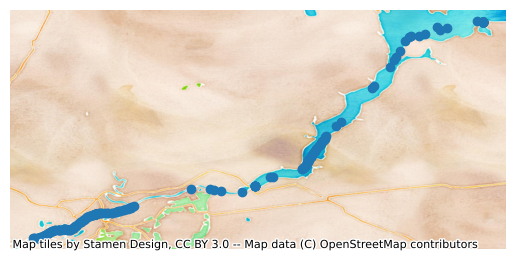

In [73]:
import geopandas as gpd
import contextily as ctx

AIS_sample = AIS.loc[AIS['mmsi'] == 272168100]
example = gpd.GeoDataFrame(
    AIS_sample,
    geometry = gpd.points_from_xy(AIS_sample.longitude, AIS_sample.latitude),
    crs = 4326
)

ax = example.plot()
ctx.add_basemap(ax, source = ctx.providers.Stamen.Watercolor, crs = 4326)
ax.set_axis_off()
#geometry=geopandas
#.nunique()

In [53]:
ship_data_enriched.loc[ship_data_enriched["ShipTypeLevel1"] == "Cargo Carrying"].value_counts('ShipTypeLevel3', normalize = True)

ShipTypeLevel3
General Cargo                0.325074
Bulk Dry                     0.169043
Oil                          0.150646
Container                    0.074034
Chemical                     0.067596
Passenger                    0.050659
Ro-Ro Cargo                  0.037783
Passenger/Ro-Ro Cargo        0.037624
Liquefied Gas                0.028497
Other Bulk Dry               0.019434
Refrigerated Cargo           0.017081
Passenger / General Cargo    0.007459
Other Dry Cargo              0.006167
Bulk Dry / Oil               0.003726
Other Liquids                0.002673
Self Discharging Bulk Dry    0.002505
dtype: float64